<a href="https://colab.research.google.com/github/athersoft/ADA-Informes/blob/main/Informe%203%20-%20M%C3%A1ximo%20subarreglo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Descrición del problema

Entrada: Un arreglo de una dimensión

Salida: El subarreglo contenido en este arreglo cuya suma de elementos seguidos sea mayor

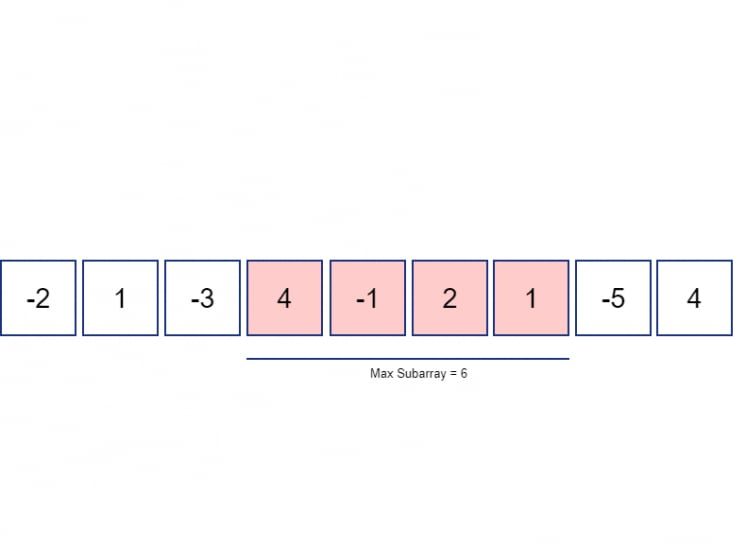

El problema del subarreglo máximo consiste en buscar la secuencia de números positivo seguidos con mayor suma de sus elementos dentro de un arreglo unidimensional.

Solucionar este problema se puede utilizar para situaciones prácticas como identificar los mejores momentos de compra-venta en un gráfico así como para el análisis de las secuencias de ADN.

#2-Código

In [96]:
import sys

def MaxSubArrayMid(array):
  mid = len(array)//2 #Calcula el índice medio del arreglo

  totalIzq = 0
  totalDer = 0

  indiceIzq = mid
  indiceDer = mid

  #Bucle que suma el subarreglo de la mitad hacia la izquierda
  for i in range(mid, 0, -1):
    if array[i] > 0:
      totalIzq+= array[i]
      indiceIzq = i
    else:
      break

  #Bucle que suma el subarreglo de la mitad hacia la derecha
  for i in range(mid+1, len(array)):
    if array[i] > 0:
      totalDer+= array[i]
      indiceDer = i
    else:
      break

  #Retorna la suma de ambos totales y los índices
  return totalDer+totalIzq,indiceIzq,indiceDer


def MaxSubArray(array, verbose = False):
  if len(array) > 1:

    #Divide el arreglo en dos mitades
    mid = len(array)//2
    izq = array[:mid]   
    der = array[mid:]

    total = 0
    izqMax = 0
    derMax = 0
    
    #Arreglos que guardan los índices de los máximos subarreglos:
    #Posicion 0: índices del arreglo izquierdo
    #Posicion 1: índices del arreglo derecho
    #Posicion 2: índices del subarreglo que contiene el valor del medio
    indiceIzq = [0,0,0]
    indiceDer = [0,0,0]
    indiceAux = 0


    #Llamada recursiva para el arreglo izquierdo
    midMax, indiceIzq[2], indiceDer[2] = MaxSubArrayMid(array)

    #Búsqueda del máximo subarreglo del arreglo izquierdo
    izqMax,indiceIzq[0], indiceDer[0] = MaxSubArray(izq)
    for i in range(0, len(izq)):
        if(izq[i] < 0):
          total = 0
          indiceAux = i+1
        else:
          total += izq[i]
        if total > izqMax:
            indiceIzq[0] = indiceAux
            indiceDer[0] = i
            izqMax = total

    indiceAux = 0
    total = 0
    #Llamada recursiva para el arreglo derecho
    derMax,indiceIzq[1], indiceDer[1] = MaxSubArray(der)

    #Búsqueda del máximo subarreglo del arreglo derecho
    for i in range(0, len(der)):
        if(der[i] < 0):
          total = 0
          indiceAux = i+1
        else:
          total += der[i]
        if total > derMax:
          indiceIzq[1] = indiceAux+len(izq)
          indiceDer[1] = i+len(izq)
          derMax = total
    
    if(verbose):
      print("\nArray recibido:", array)
      print("Array izquierda:", izq)
      print("Array derecha", der)
      print("Maximo subarreglo a la izquierda:", izqMax, " en la posicion", indiceIzq[0],",",indiceDer[0])
      print("Maximo subarreglo a la derecha", derMax, " en la posicion", indiceIzq[1],",",indiceDer[1])
      print("Maximo subarreglo que contiene el valor de la mitad", midMax, " en la posicion", indiceIzq[2],",",indiceDer[2])

    #Determina el caso del índice a retornar
    caso = 0
    if derMax > derMax and derMax > midMax:
      caso = 1
    if midMax > derMax and midMax > izqMax:
      caso = 2

    #Retorna la mayor suma de los subarreglos y los índices donde se encuentra el mayor
    return max(izqMax, derMax, midMax), indiceIzq[caso], indiceDer[caso]

  else:
    return array[0],0,0
if __name__ == '__main__':
 
    array = [2,-5,4,6,2,-9,7,2]
    print("Areglo a evaluar: ", array)
    sum,indiceIzq,indiceDer = MaxSubArray(array)
    print('La mayor suma es', sum)
    print("En el subarreglo que va desde el indice", indiceIzq, "hasta el indice", indiceDer)


Areglo a evaluar:  [2, -5, 4, 6, 2, -9, 7, 2]
La mayor suma es 12
En el subarreglo que va desde el indice 2 hasta el indice 4


#2.1-Descripción del código

-El código recibe un arreglo unidimensional 

-Divide en dos mitades el arreglo

-Busca el máximo subarreglo en cada mitad de manera recursiva

-Luego busca la máxima suma que contenga el área en la que se dividió el arreglo

-La mayor suma entre las 3 es la que retorna el algoritmo

#2.2-Ejecución paso a paso

Utilizando la opción verbose = True, podemos observar la ejecución paso a paso del algoritmo.

Areglo a evaluar:  [2, -5, 4, 6, 2, -9, 7, 2]

Array recibido: [2, -5]

Array izquierda: [2]

Array derecha [-5]

Maximo subarreglo a la izquierda: 2  en la posicion 0 , 0

Maximo subarreglo a la derecha 0  en la posicion 2 , 1

Maximo subarreglo que contiene el valor de la mitad 0  en la posicion 1 , 1


Array recibido: [4, 6]

Array izquierda: [4]

Array derecha [6]

Maximo subarreglo a la izquierda: 4  en la posicion 0 , 0

Maximo subarreglo a la derecha 6  en la posicion 0 , 0

Maximo subarreglo que contiene el valor de la mitad 6  en la posicion 1 , 1


Array recibido: [2, -5, 4, 6]

Array izquierda: [2, -5]

Array derecha [4, 6]

Maximo subarreglo a la izquierda: 2  en la posicion 0 , 0

Maximo subarreglo a la derecha 10  en la posicion 2 , 3

Maximo subarreglo que contiene el valor de la mitad 10  en la posicion 2 , 3


Array recibido: [2, -9]

Array izquierda: [2]

Array derecha [-9]

Maximo subarreglo a la izquierda: 2  en la posicion 0 , 0

Maximo subarreglo a la derecha 0  en la posicion 2 , 1

Maximo subarreglo que contiene el valor de la mitad 0  en la posicion 1 , 1


Array recibido: [7, 2]

Array izquierda: [7]

Array derecha [2]

Maximo subarreglo a la izquierda: 7  en la posicion 0 , 0

Maximo subarreglo a la derecha 2  en la posicion 0 , 0

Maximo subarreglo que contiene el valor de la mitad 2  en la posicion 1 , 1


Array recibido: [2, -9, 7, 2]

Array izquierda: [2, -9]

Array derecha [7, 2]

Maximo subarreglo a la izquierda: 2  en la posicion 0 , 0

Maximo subarreglo a la derecha 9  en la posicion 2 , 3

Maximo subarreglo que contiene el valor de la mitad 9  en la posicion 2 , 3


Array recibido: [2, -5, 4, 6, 2, -9, 7, 2]

Array izquierda: [2, -5, 4, 6]

Array derecha [2, -9, 7, 2]

Maximo subarreglo a la izquierda: 10  en la posicion 0 , 0

Maximo subarreglo a la derecha 9  en la posicion 0 , 0

Maximo subarreglo que contiene el valor de la mitad 12  en la posicion 2 , 4


La mayor suma es 12

En el subarreglo que va desde el indice 2 hasta el indice 4


#3.1-Correctitud función MaxSubArrayMid

**Teorema:**

  La función MaxSubArrayMid retorna la suma de los valores del subarreglo que contiene el valor del medio.


**Prueba del teorema:**

  La función MaxSubArrayMid recibe como parámetro un arreglo, para comprobar que realiza corretamente el proceso de suma de los valores del subarreglo, observaremos dos casos:

  Si el valor de la mitad de arreglo es negativo: En esa situación se puede afirmar que no hay un subarreglo que contenga el valor ubicado en la mitad del arreglo original, por lo tanto se retorna un 0.

  Si el valor de la mitad de arreglo es positivo: En este caso, se procede con la suma de los valores desde n/2 hasta 0 o hasta toparse con un número negativo, luego, con los valores de n/2+1 hasta el largo del arreglo, ambos valores forman parte de un subarreglo válido que contiene el valor medio, por lo tanto la suma de ambos, sigue siendo un subarreglo válido y representa la suma del máximo subarreglo que contiene el valor del medio.

#3.2-Correctitud función MaxSubArray

**Teorema:**

La función MaxSubArray en base a un arreglo que recibe como parámetro, devuelve el subarreglo que contenga la mayor suma de sus elementos continuos.

**Prueba del teorema:**

Caso base: Si el arreglo recibido tiene un solo elemento, devuelve este ya que es el mayor.

Caso general: Se asume que la función es correcta para arreglos de cualquier tamaño, la función divide en dos el arreglo original, buscando el máximo subarreglo de cada mitad de forma recursiva, para luego comparar ambos resultados con el que nos entrega la función MaxSubArrayMid, la cual ya probamos su correctitud.

#4-Tiempo de ejecución

Para el arreglo de largo n realizaremos dos llamadas recursivas con entrada de largo n/2, formando de esta manera ramificaciones cuyo tiempo de ejecución es O(log n), luego la función MaxSubArrayMid busca de manera lineal, por lo que la complejidad queda como O(n * log n)

**Mejor caso**: Solo hay un elemento en el arreglo, se retorna ese elemento

**Peor caso**: Si todos los números en el arreglo son positivos, la función MaxSubArrayMid realizará el mayor número de operaciones posible, además de que se realizarán recursiones innecesarias debido a que el máximo subarreglo en este caso es el arreglo completo.

#5-Experimentos

 **Tiempo de ejecución:**
 
Compararemos el tiempo de ejecución de la implementación "Divide y vencerás" con el algoritmo de kadane.

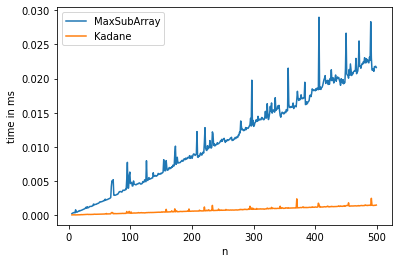

In [95]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

import sys
 
 
# Algoritmo de Kadane, créditos a https://www.techiedelight.com/
def kadane(A):

    max_so_far = -sys.maxsize
    max_ending_here = 0
 
    for i in range(len(A)):
        max_ending_here = max_ending_here + A[i]
 
        max_ending_here = max(max_ending_here, A[i])
 
        max_so_far = max(max_so_far, max_ending_here)
 
    return max_so_far


x=[]; y=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a})", repeat=1, number=10)
  q = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(q)


plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["MaxSubArray", "Kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

**Análisis de resultado:**

La gráfica nos deja ver que la complejidad O(n) del algoritmo de kadane resuelve el problema de manera mucho más eficiente que el algoritmo divide y vencerás.